In [1]:
import re
import numpy as np
import seaborn as sns
import os
import pandas as pd
import sklearn as sk
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [2]:
print(os.listdir(), '\n', os.getcwd())

with open('plot_time.csv', 'r') as init_data:
    raw_data = pd.read_csv(init_data)

['.git', '.gitattributes', '.ipynb_checkpoints', 'big_MCI_plot.png', 'data_analysis_script.py', 'DX_bl_big_MCI_plot.png', 'EDA.ipynb', 'eda2.ipynb', 'plot_time.csv', 'prelim data analysis.py', 'PTGENDER_big_MCI_plot.png', 'simple_data.csv', 'TADPOLE_D1_D2.csv', 'TADPOLE_D1_D2.py', 'TADPOLE_D1_D2_Dict.csv', 'TADPOLE_D2.m', 'TADPOLE_D3.csv', 'TADPOLE_D3.m', 'TADPOLE_readme.txt'] 
 C:\Users\work_cbdvl\Documents\GitHub\Project-daybreak


In [3]:
patients = raw_data.loc[:,"RID"].unique()

changers = np.zeros(len(patients))
impaired = np.zeros(len(patients))

cata = pd.DataFrame(patients)
cata["change"] = changers
cata["impaired"] = impaired
cata.rename(columns={0:"RID"}, inplace=True)

for i,v in enumerate(cata.loc[:,"RID"]):
    vals = raw_data.loc[raw_data["RID"] == v, ["DX_bl", "DXCHANGE"]]
    if sum(vals.DXCHANGE > 3) > 0:
        cata.loc[i, "change"] = 1
    if ((vals.DX_bl.any() != "CN") | sum(vals.DXCHANGE > 1) > 0):
        cata.loc[i, "impaired"] = 1      
        

loop = raw_data.copy()
loop["change"] = np.zeros(len(raw_data))
loop["impaired"] = np.zeros(len(raw_data))
for i in patients:
    loop.loc[loop["RID"] == i, "change"] = cata.loc[cata["RID"] == i, "change"].mean()
    loop.loc[loop["RID"] == i, "impaired"] = cata.loc[cata["RID"] == i, "impaired"].mean()
loop.describe()

In [29]:
merge = pd.merge(raw_data, cata, on="RID", how="outer")


array(['Male', 'Female'], dtype=object)

In [31]:

merge.PTGENDER = merge.PTGENDER.astype("category")

In [32]:
merge.PTMARRY = merge.PTMARRY.astype("category")
merge.PTETHCAT = merge.PTETHCAT.astype("category")
merge.PTRACCAT = merge.PTRACCAT.astype("category")
merge.change = merge.change.astype("category")
merge.impaired = merge.impaired.astype("category")


In [37]:
test = merge.M.dtype
type(test)

numpy.dtype

In [34]:
merge.describe()

,Unnamed: 0,RID,AGE,PTEDUCAT,APOE4,CDRSB_bl,ADAS11_bl,ADAS13_bl,MMSE_bl,RAVLT_immediate_bl,...,Hippocampus,WholeBrain,Entorhinal,MidTemp,FDG,AV45,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,VISNUMS
count,12741.000000,12741.000000,12741.000000,12741.000000,12729.000000,12741.000000,12724.000000,12663.000000,12741.000000,12705.000000,...,6802.000000,7.689000e+03,6469.000000,6469.000000,3352.000000,2118.000000,2371.000000,2371.000000,2370.000000,12741.000000
mean,6370.000000,2240.325720,73.814865,15.988384,0.537277,1.355820,9.814569,15.505631,27.566910,36.452499,...,6681.723758,1.011816e+06,3444.718813,19203.260318,1.208239,1.194780,1023.744285,293.062876,28.068156,25.859901
std,3678.154225,1855.269911,6.973068,2.829707,0.655835,1.554823,5.908569,8.713772,2.394201,12.046854,...,1239.952328,1.119606e+05,811.771966,3138.155124,0.160831,0.227518,597.445735,132.260409,14.569570,25.945824
min,0.000000,2.000000,54.400000,4.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,...,2219.000000,6.490910e+05,1041.000000,8044.000000,0.636804,0.835796,100.000000,40.000000,4.000000,0.000000
25%,3185.000000,618.000000,69.600000,14.000000,0.000000,0.000000,5.670000,9.000000,26.000000,28.000000,...,5830.000000,9.337950e+05,2905.000000,17183.000000,1.109723,1.010035,572.150000,202.600000,17.797500,6.000000
50%,6370.000000,1280.000000,73.800000,16.000000,0.000000,1.000000,8.670000,14.000000,28.000000,35.000000,...,6759.500000,1.009330e+06,3482.000000,19240.000000,1.219805,1.113975,832.000000,264.400000,24.470000,18.000000
75%,9555.000000,4328.000000,78.700000,18.000000,1.000000,2.000000,13.000000,20.330000,29.000000,45.000000,...,7583.000000,1.088250e+06,4013.000000,21397.000000,1.314253,1.362275,1375.500000,356.500000,34.397500,36.000000
max,12740.000000,5296.000000,91.400000,20.000000,2.000000,10.000000,42.670000,54.670000,30.000000,71.000000,...,11207.000000,1.486040e+06,6711.000000,32189.000000,1.753320,2.669210,3592.000000,1500.000000,150.000000,120.000000


In [35]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12741 entries, 0 to 12740
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Unnamed: 0                  12741 non-null  int64   
 1   RID                         12741 non-null  int64   
 2   EXAMDATE                    12741 non-null  object  
 3   DX_bl                       12741 non-null  object  
 4   AGE                         12741 non-null  float64 
 5   PTGENDER                    12741 non-null  category
 6   PTEDUCAT                    12741 non-null  int64   
 7   PTETHCAT                    12741 non-null  category
 8   PTRACCAT                    12741 non-null  category
 9   PTMARRY                     12741 non-null  category
 10  APOE4                       12729 non-null  float64 
 11  EXAMDATE_bl                 12741 non-null  object  
 12  CDRSB_bl                    12741 non-null  float64 
 13  ADAS11_bl       

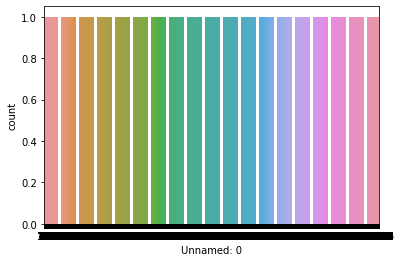

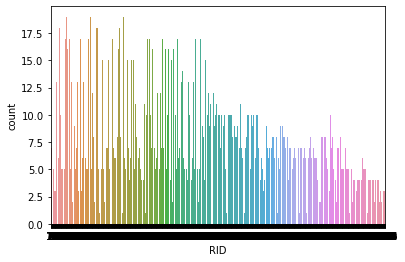

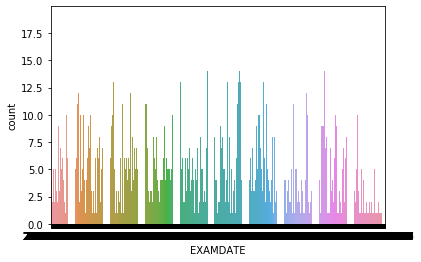

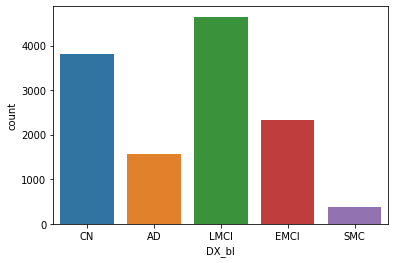

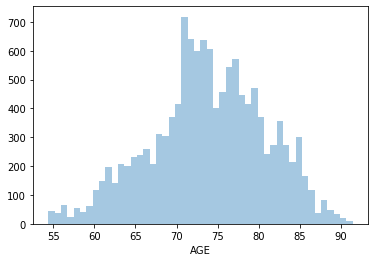

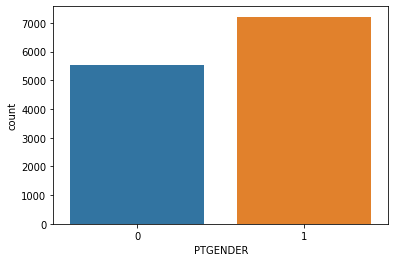

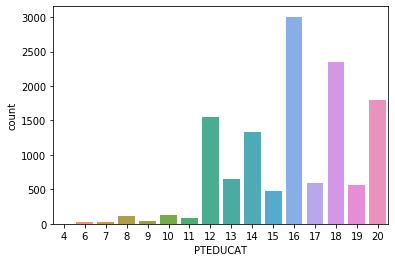

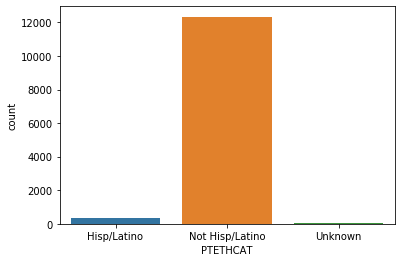

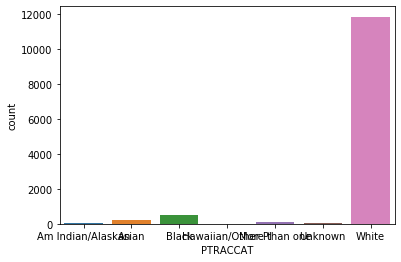

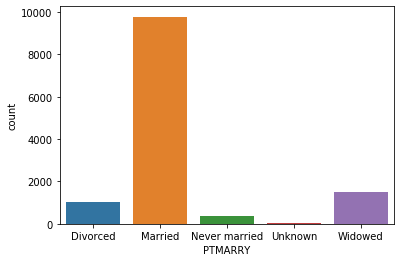

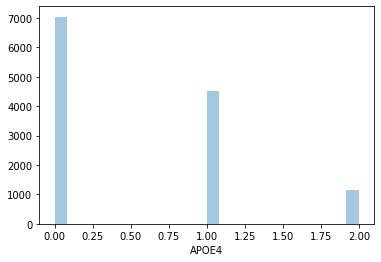

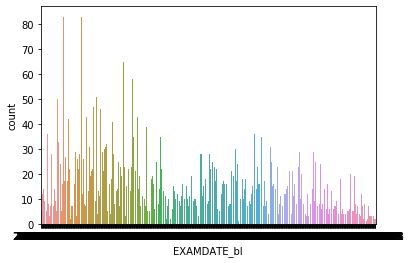

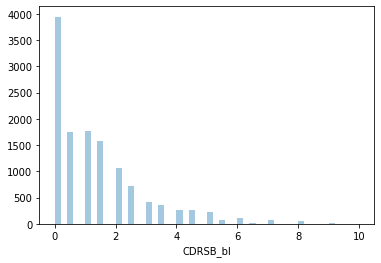

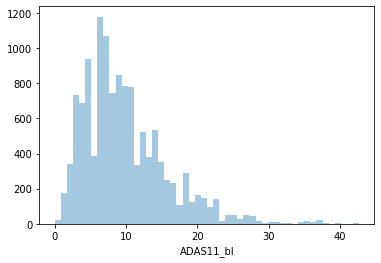

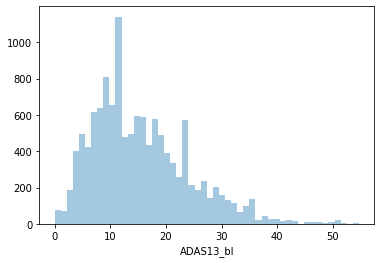

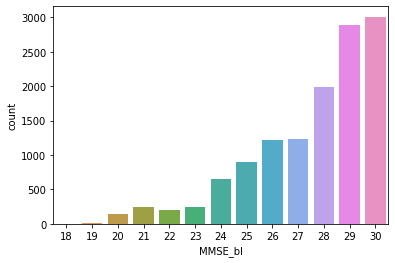

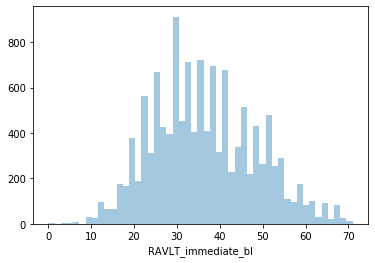

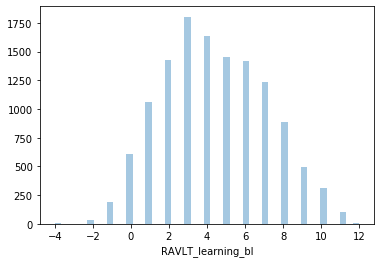

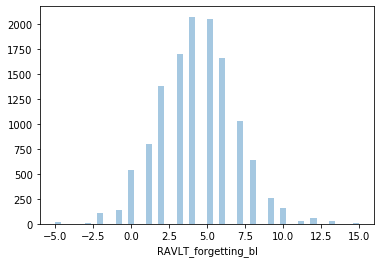

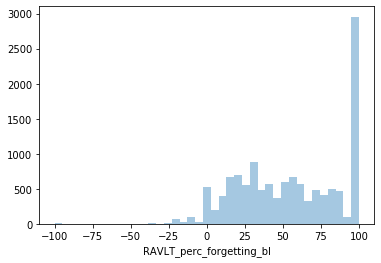

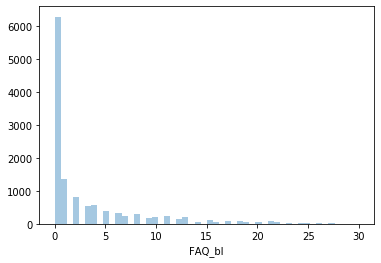

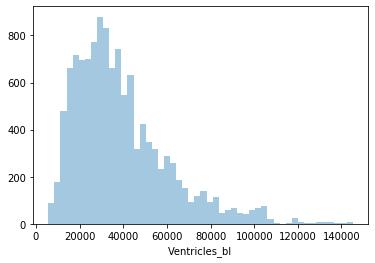

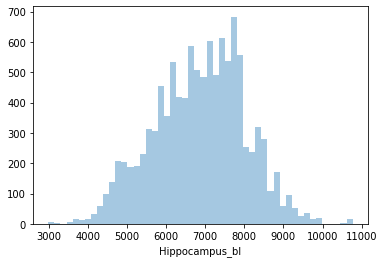

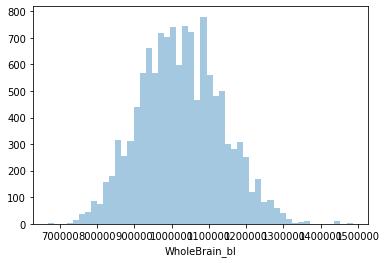

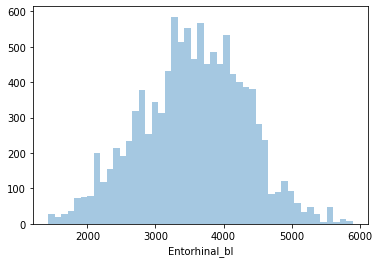

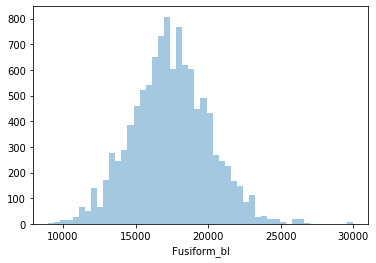

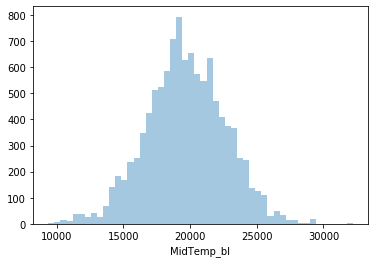

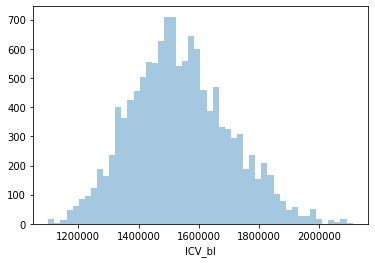

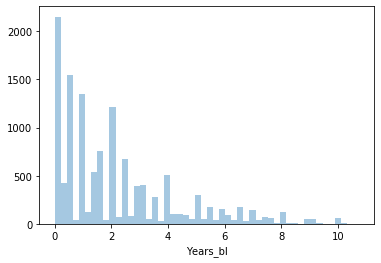

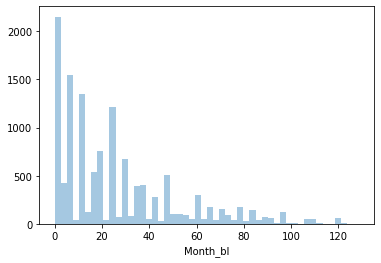

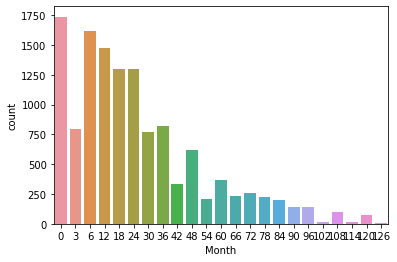

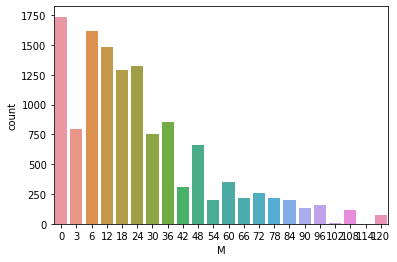

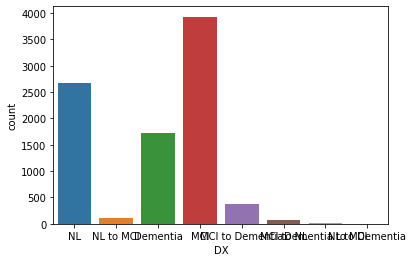

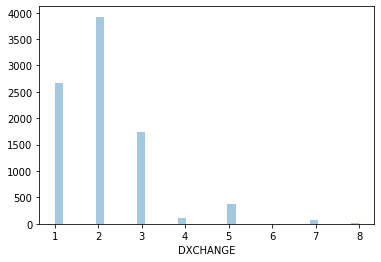

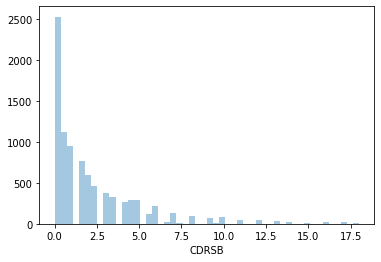

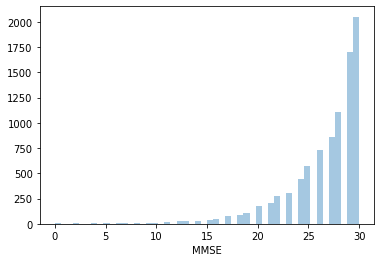

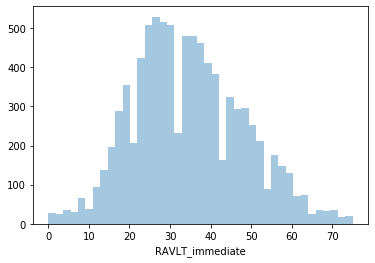

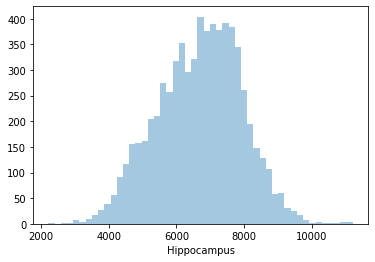

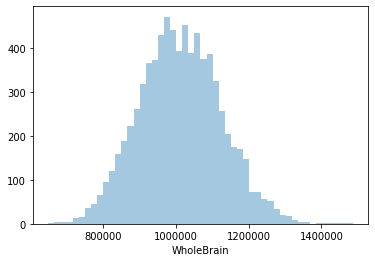

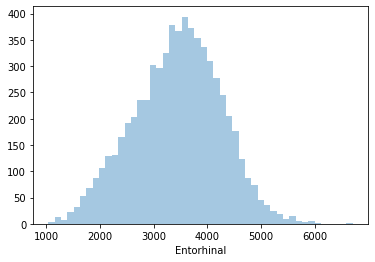

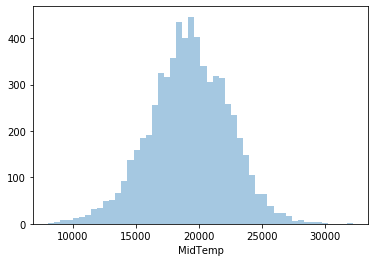

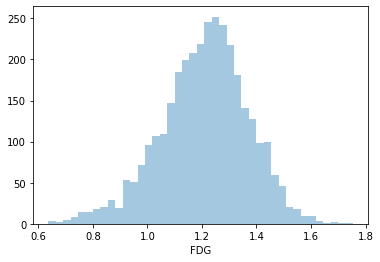

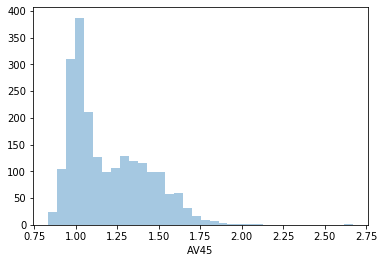

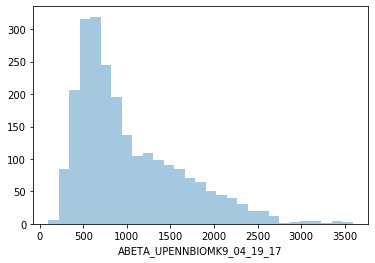

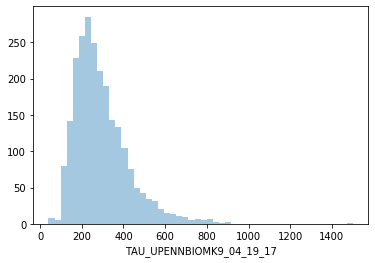

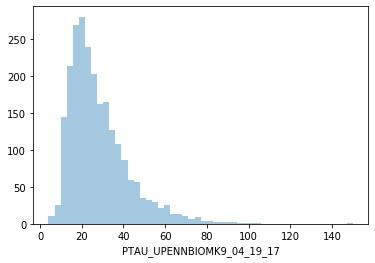

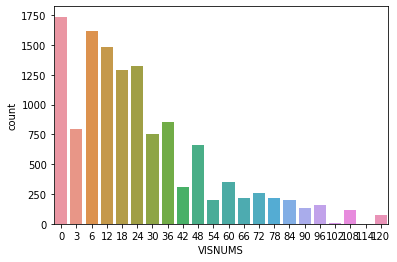

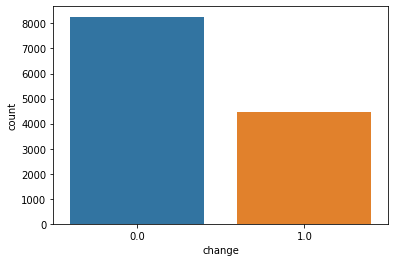

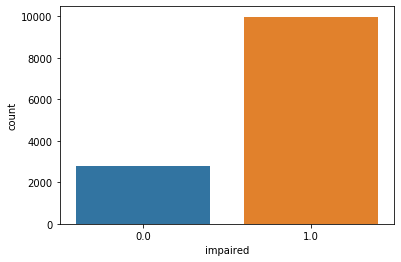

In [39]:
for i in merge.columns:
    
    if merge[i].dtype == ("float64" or "int64"):
        sns.distplot(merge[i], kde=False)
        plt.show()
    else:
        sns.countplot(x=i, data = merge)
        plt.show()

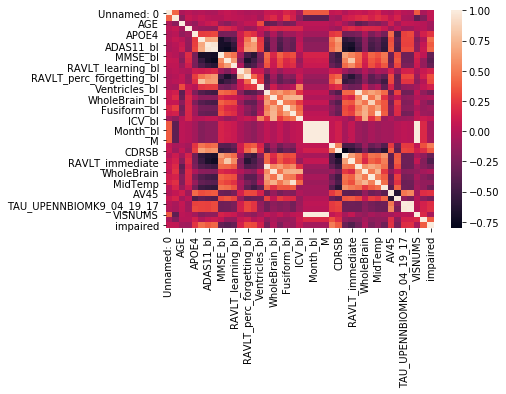

In [9]:
plot_cols = merge.select_dtypes(include ="number")
sns.heatmap(plot_cols.corr())